In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(train_images,train_labels),(test_images,test_labels) = cifar10.load_data()
classes = np.unique(train_labels)
nClasses = len(classes)
cifar_classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [3]:
nrows,ncols,ndims = train_images.shape[1:]
input_shape = (nrows,ncols,ndims)
train_data = train_images.astype("float32")
test_data = test_images.astype("float32")
train_data /= 255
test_data /= 255
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)
print(train_labels_onehot.shape)

(50000, 10)


In [4]:
def createModel():
    model = Sequential()
    model.add(Conv2D(32,(3,3),padding="same",activation="relu",input_shape=input_shape))
    model.add(Conv2D(32,(3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64,(3,3),padding="same",activation="relu"))
    model.add(Conv2D(64,(3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64,(3,3),padding="same",activation="relu"))
    model.add(Conv2D(64,(3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512,activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses,activation="softmax"))
    return model

In [5]:
model1 = createModel()
batch_size=256
epochs=50
model1.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["acc"])
model1.summary()
print(train_data.shape)
print(train_labels.shape)
history = model1.fit(train_data,train_labels_onehot,batch_size=batch_size,
                     epochs=epochs,verbose=1,
                     validation_data=(test_data,test_labels_onehot))
model1.evaluate(test_data,test_labels_onehot)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)         

50000/50000 [==============================] - 7s 145us/step - loss: 0.4898 - acc: 0.8296 - val_loss: 0.6327 - val_acc: 0.8011
Epoch 42/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.4878 - acc: 0.8349 - val_loss: 0.6949 - val_acc: 0.7823
Epoch 43/50
50000/50000 [==============================] - 7s 141us/step - loss: 0.4808 - acc: 0.8344 - val_loss: 0.6588 - val_acc: 0.7903
Epoch 44/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.4789 - acc: 0.8358 - val_loss: 0.7333 - val_acc: 0.7855
Epoch 45/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.4812 - acc: 0.8356 - val_loss: 0.6970 - val_acc: 0.7827
Epoch 46/50
50000/50000 [==============================] - 7s 141us/step - loss: 0.4826 - acc: 0.8353 - val_loss: 0.6223 - val_acc: 0.8027
Epoch 47/50
50000/50000 [==============================] - 7s 141us/step - loss: 0.4701 - acc: 0.8376 - val_loss: 0.6197 - val_acc: 0.8092
Epoch 48/50
50000/50000 [==============

[0.6480282867908478, 0.7918000221252441]

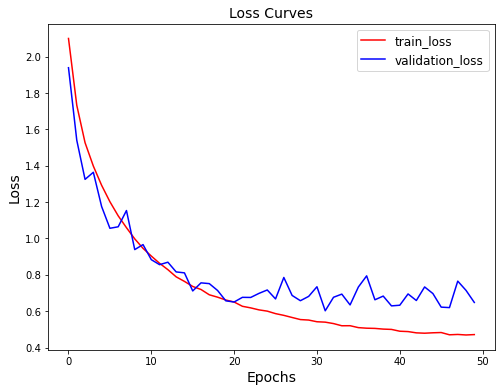

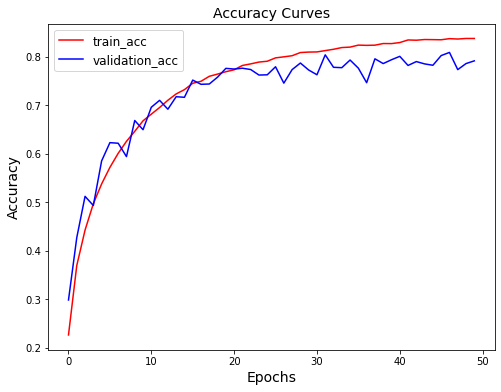

In [6]:
plt.figure(figsize=[8,6])
plt.plot(history.history["loss"],"r")
plt.plot(history.history["val_loss"],"b")
plt.legend(["train_loss","validation_loss"],fontsize=12)
plt.xlabel("Epochs",fontsize=14)
plt.ylabel("Loss",fontsize=14)
plt.title("Loss Curves",fontsize=14)

plt.figure(figsize=[8,6])
plt.plot(history.history["acc"],"r")
plt.plot(history.history["val_acc"],"b")
plt.legend(["train_acc","validation_acc"],fontsize=12)
plt.xlabel("Epochs",fontsize=14)
plt.ylabel("Accuracy",fontsize=14)
plt.title("Accuracy Curves",fontsize=14)
plt.show()

In [9]:
from keras.preprocessing.image import ImageDataGenerator
model2 = createModel()
model2.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["acc"])
batch_size = 256
epochs = 50
datagen = ImageDataGenerator(
            zoom_range=0.2,
            rotation_range=10,
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True,
            vertical_flip=False)

In [10]:
history2 = model2.fit_generator(datagen.flow(train_data,train_labels_onehot,batch_size=batch_size),
                               steps_per_epoch=int(np.ceil(train_data.shape[0]/float(batch_size))),
                               epochs=epochs,
                               validation_data=(test_data,test_labels_onehot),
                               workers=4)
model2.evaluate(test_data,test_labels_onehot)
model2.save("model.h5")

Epoch 1/50
196/196 [==============================] - 22s 110ms/step - loss: 2.0808 - acc: 0.2274 - val_loss: 1.8036 - val_acc: 0.3515
Epoch 2/50
196/196 [==============================] - 21s 106ms/step - loss: 1.7889 - acc: 0.3529 - val_loss: 1.5282 - val_acc: 0.4505
Epoch 3/50
196/196 [==============================] - 21s 107ms/step - loss: 1.6257 - acc: 0.4151 - val_loss: 1.6816 - val_acc: 0.4002
Epoch 4/50
196/196 [==============================] - 21s 107ms/step - loss: 1.5127 - acc: 0.4553 - val_loss: 1.3529 - val_acc: 0.5118
Epoch 5/50
196/196 [==============================] - 21s 107ms/step - loss: 1.4209 - acc: 0.4927 - val_loss: 1.2327 - val_acc: 0.5612
Epoch 6/50
196/196 [==============================] - 21s 107ms/step - loss: 1.3455 - acc: 0.5208 - val_loss: 1.1454 - val_acc: 0.5900
Epoch 7/50
196/196 [==============================] - 21s 108ms/step - loss: 1.2850 - acc: 0.5464 - val_loss: 1.2635 - val_acc: 0.5612
Epoch 8/50
196/196 [==============================] - 2

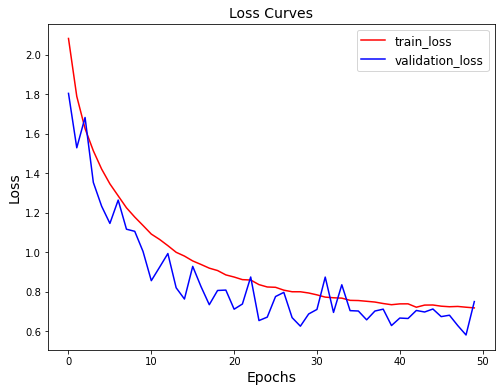

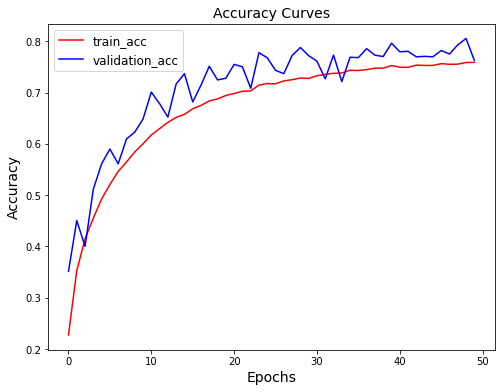

In [11]:
plt.figure(figsize=[8,6])
plt.plot(history2.history["loss"],"r")
plt.plot(history2.history["val_loss"],"b")
plt.legend(["train_loss","validation_loss"],fontsize=12)
plt.xlabel("Epochs",fontsize=14)
plt.ylabel("Loss",fontsize=14)
plt.title("Loss Curves",fontsize=14)

plt.figure(figsize=[8,6])
plt.plot(history2.history["acc"],"r")
plt.plot(history2.history["val_acc"],"b")
plt.legend(["train_acc","validation_acc"],fontsize=12)
plt.xlabel("Epochs",fontsize=14)
plt.ylabel("Accuracy",fontsize=14)
plt.title("Accuracy Curves",fontsize=14)
plt.show()